# Lending Club Case Study

### Installing necessary library

In [334]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

### Reading Data

In [335]:
loan= pd.read_csv("loan.csv")
loan.shape

(39717, 111)

### Basic EDA

In [336]:
# Getting Count of Rows, Columns and their Datatypes 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [337]:
# Statististical Analysis
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Creating  few Derived Variables

####  'term_int'  (to bring month in number(as integer)) from 'term' variable

In [338]:
spl= lambda x: x.split()[0]

loan['term_int']=list(map(spl, loan.term))

#Converting as Float
loan['term_int']= loan['term_int'].astype(int)

##### Creating   'int_rate_%'  (to remove "%" sign)   from   'int_rate'   as integer

In [339]:
rem_per= lambda x:x.split("%")[0]

loan['int_rate_%'] = list(map(rem_per, loan.int_rate))

#Converting as Float
loan['int_rate_%']=loan['int_rate_%'].astype(float)

##### Creating   'revol_util_%' (to remove "%" sign)    from 'revol_util'   as integer

In [340]:
loan['revol_util']= loan['revol_util'].astype(str)

#rem_per= lambda x:x.str.split(" %")[0]


def rem_per(x):
    if "%" in x:
        return x.split("%")[0]
    else:
        return x

        
#aaa=['83.7%', '33.7%' , '11.1%', '00.0%','', '78']        
        
loan['revol_util_%'] = loan['revol_util'].apply(rem_per) 

#Converting as Float

loan['revol_util_%']=loan['revol_util_%'].astype(float)


##### Creating  'Diff_Amount' (Diff_Amount = Loan_amnt - funded_amnt_inv)

In [341]:
loan['Diff_Amount']= loan['loan_amnt']- loan['funded_amnt_inv']

##### Converting Categorical Dependent Variable to Nominal data (to check correlation with indipendent variable)

In [345]:
# Label Encoding for dependent variable

from sklearn.preprocessing import LabelEncoder

for x in loan:
    le=LabelEncoder()
    
    loan['loan_status_Target']= le.fit_transform(loan["loan_status"])
    
loan[['loan_status','loan_status_Target']]

,loan_status,loan_status_Target
0,Fully Paid,2
1,Charged Off,0
2,Fully Paid,2
3,Fully Paid,2
4,Current,1
...,...,...
39712,Fully Paid,2
39713,Fully Paid,2
39714,Fully Paid,2
39715,Fully Paid,2


#### Removing other variables which are not helpfull for our analysis

In [346]:
loan_imp_var=loan.drop(['id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'initial_list_status',
                            'policy_code','application_type', 'acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths', 
                            'tax_liens','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','delinq_amnt'],axis=1)

## Checking for missing values Percentage

In [347]:
loan_imp_var.isna().sum()/len(loan)*100

loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
purpose                             0.000000
addr_state                          0.000000
dti                                 0.000000
delinq_2yrs                         0.000000
earliest_cr_line                    0.000000
inq_last_6mths                      0.000000
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
open_acc  

#### Removing Columns having missing values > 90%

In [348]:
#Droppig column having 100% missing values
loan_rmna=loan_imp_var.dropna(axis=1, how='all')


#Droppig column having > 90% missing values
loan_final=loan_rmna.drop(['next_pymnt_d','mths_since_last_record'], axis=1)

### Checking count of missing values

In [349]:
loan_final.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

### List of Missing Value with Missing %

##### 1. emp_length (~0.02% missing values)
##### 2. mths_since_last_delinq (~0.64% missing values)
##### 3. revol_util (~0.001% missing values)
##### 4. pub_rec_bankruptcies (~0.01% missing values)





## Missing values imputation 

##### 1. "emp_length" 

#### Trying to find pattern for missing emp_length   

In [350]:
loan_final.fillna('missing').groupby('emp_length')['annual_inc'].agg({'mean','min','max'})

,mean,min,max
emp_length,,,
1 year,62644.619630,4800.0,1200000.0
10+ years,81706.534351,8088.0,6000000.0
2 years,63274.658548,7000.0,1250000.0
3 years,66787.181446,4200.0,3900000.0
4 years,66583.756967,8004.0,700000.0
5 years,68225.204153,9600.0,1900000.0
6 years,68184.618605,10000.0,660000.0
7 years,69153.096943,6000.0,1440000.0
8 years,74590.468519,14000.0,1080000.0


#### By looking at above analysis output, we can somehow conclude that the missing emp_length should fall into either '<1 year' or may be even smaller. 
#### Eg.: It could be in months (say <6 months) or could be "intern"     

##### As we don't have any clear anaswer, so 
#### Imputing mising values as 'Not Mentioned'

In [351]:
loan_final['emp_length']=loan_final['emp_length'].fillna('Not Mentioned')

#### 2. mths_since_last_delinq 
#### Trying to find pattern for missing rows

In [352]:
loan_final.groupby('loan_status')['mths_since_last_delinq'].agg({'min', 'max', 'mean', 'median'})

,mean,median,min,max
loan_status,,,,
Charged Off,36.157330,34.0,0.0,107.0
Current,36.595041,34.0,1.0,103.0
Fully Paid,35.831483,34.0,0.0,120.0


In [353]:
loan_final['mths_since_last_delinq'].median()

34.0

In [354]:
CO=loan_final['mths_since_last_delinq'][loan_final['loan_status']=='Charged Off'].mean()
C=loan_final['mths_since_last_delinq'][loan_final['loan_status']=='Current'].mean()
FP=loan_final['mths_since_last_delinq'][loan_final['loan_status']=='Fully Paid'].mean()

#Condition
conditions=[ (loan_final['mths_since_last_delinq'].isna())  & (loan_final['loan_status']=='Charged Off' ),
             (loan_final['mths_since_last_delinq'].isna())  & (loan_final['loan_status']=='Current' ),
             (loan_final['mths_since_last_delinq'].isna())  & (loan_final['loan_status']=='Fully Paid' )   
           ]

choices=(CO,C,FP)

import numpy as np
loan_final['mths_since_last_delinq']=np.select(conditions, choices, default=loan_final['mths_since_last_delinq'])

##### Imputing mean value wrt loan_status (Not updating median value)

##### 3. revol_util
#### Trying to find pattern for missing mths_since_last_delinq

In [355]:
#loan_final.fillna('missing').groupby('emp_length')['revol_util_%'].agg({'min',  'max'})

loan_final.groupby('loan_status')['revol_util_%'].agg({'mean','min','max', 'median'})

,mean,median,min,max
loan_status,,,,
Charged Off,55.572110,58.40,0.0,99.9
Current,53.204482,54.95,0.0,99.9
Fully Paid,47.531801,47.60,0.0,99.9


In [356]:
#imputing median vaue for missing values 

loan_final['revol_util_%']=loan_final['revol_util_%'].fillna(loan_final['revol_util_%'].median())

##### 4. pub_rec_bankruptcies: 
##### Imputing Mod for 'pub_rec_bankruptcies'

In [357]:
bankruptcies_mod= loan_final['pub_rec_bankruptcies'].mode()[0]
bankruptcies_mod

loan_final['pub_rec_bankruptcies']=loan_final['pub_rec_bankruptcies'].fillna(bankruptcies_mod)

In [358]:
loan_final.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

## Checking for Outlier

In [359]:
#Creatig saperate list for Numeric and text variables

loan_numeric=loan_final.select_dtypes(include=[float, int])
loan_text=loan_final.select_dtypes(include=object)

#### Checking Outliers  

In [360]:
loan_numeric.describe()

,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,term_int,int_rate_%,revol_util_%,Diff_Amount,loan_status_Target
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,10397.448868,324.561922,6.896893e+04,13.315130,35.899565,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.042501,42.418007,12.021177,48.832741,821.994947,1.687942
std,7128.450439,208.874874,6.379377e+04,6.678594,13.090283,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.202603,10.622815,3.724825,28.314798,2546.115547,0.705723
min,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,5.420000,0.000000,0.000000,0.000000
25%,5000.000000,167.020000,4.040400e+04,8.170000,35.831483,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,36.000000,9.250000,25.500000,0.000000,2.000000
50%,8975.000000,280.220000,5.900000e+04,13.400000,35.831483,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,36.000000,11.860000,49.300000,9.107070,2.000000
75%,14400.000000,430.780000,8.230000e+04,18.600000,36.157330,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,60.000000,14.590000,72.300000,225.000000,2.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,60.000000,24.590000,99.900000,32474.996081,2.000000


#### Checking skewness for all variables 

In [361]:
loan_numeric.skew(axis=0)

funded_amnt_inv             1.106213
installment                 1.128419
annual_inc                 30.949185
dti                        -0.028043
mths_since_last_delinq      0.515701
out_prncp                   9.226730
out_prncp_inv               9.243765
total_pymnt                 1.339857
total_pymnt_inv             1.354838
total_rec_prncp             1.118255
total_rec_int               2.668747
total_rec_late_fee          8.429536
recoveries                 16.519378
collection_recovery_fee    25.029418
last_pymnt_amnt             2.712122
pub_rec_bankruptcies        4.599421
term_int                    1.050997
int_rate_%                  0.293729
revol_util_%               -0.033662
Diff_Amount                 4.559354
loan_status_Target         -1.893524
dtype: float64

#### Looking at Skewness, we will do outlier treatment for below variables:
#### 1. annual_inc
#### 2. recoveries
#### 3. collection_recovery_fee

#### Plotting boxplot for these variables to check outliers

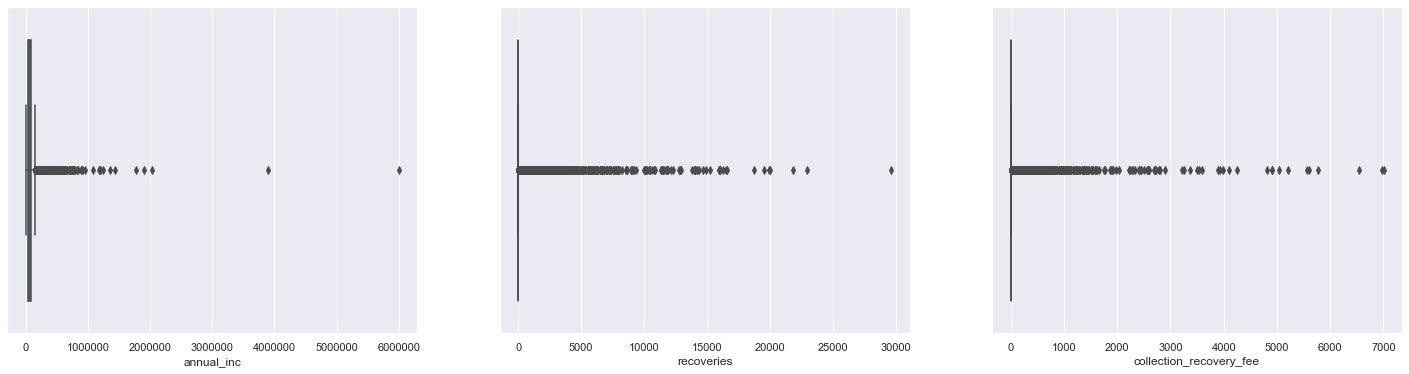

In [362]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,6))

plt.subplot(1, 3, 1)
sns.boxplot(loan_numeric['annual_inc'])

plt.subplot(1, 3, 2)
sns.boxplot(loan_numeric['recoveries'])

plt.subplot(1, 3, 3)
sns.boxplot(loan_numeric['collection_recovery_fee'])

##### By seeing at the plot, we can conclude that all outliers are at upper side 

### Outlier Treatment
###### We will do capping technique to perform outlier treatment

##### 1. annual_inc 

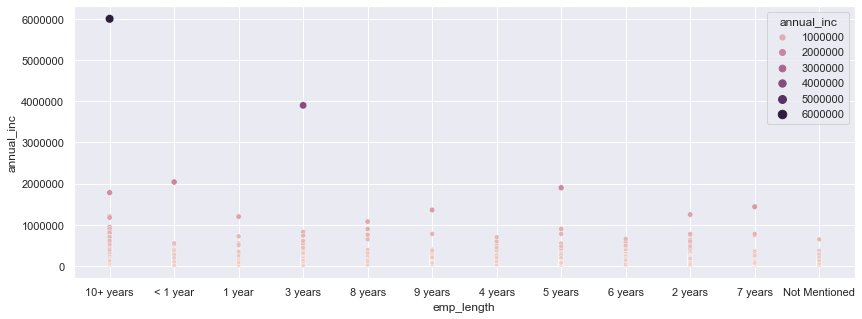

In [363]:
#Trying to find some pattern for high(outlier) annual_inc, why few people have such a huge income

plt.figure(figsize=(14,5))
sns.scatterplot(data=loan_final,  x='emp_length', y='annual_inc', hue='annual_inc', size='annual_inc')

##### There may be high chance that a person may have income= 6000000 as the experience > 10 Years, 
##### but since there are only few outlier points, so let's remove these outlier using capping technique

In [364]:
#Calculating IQR for Annual_Income

P25_AI=loan_final['annual_inc'].quantile(.25)
P75_AI=loan_final['annual_inc'].quantile(.75)

IQR_AI=P75_AI-P25_AI

Upper_Limit_AI= P75_AI + 1.5 * IQR_AI
print(Upper_Limit_AI)

145144.0


In [365]:
#Substuting all values with upper_limit(141544) if values>upper_limit 

AI_Up_cappig= lambda x: Upper_Limit_AI if x>Upper_Limit_AI else x 

loan_final['annual_inc_withoutoutlier']=list(map(AI_Up_cappig, loan_final['annual_inc']))


#### 2. recoveries

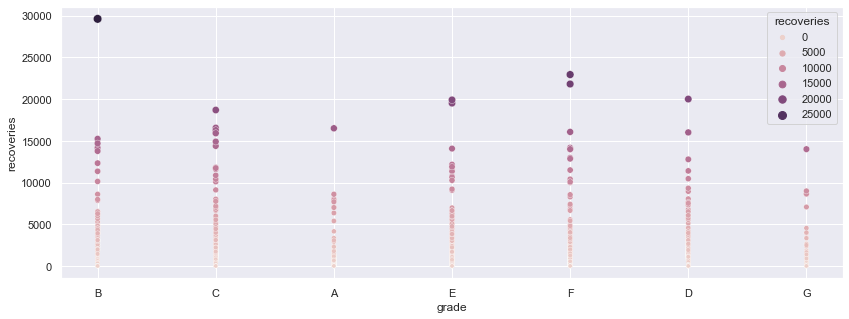

In [366]:
#Trying to find some pattern for high(outlier) recoveries, why few people have such a high value of recovery

plt.figure(figsize=(14,5))
sns.scatterplot(data=loan_final,  x='grade', y='recoveries', hue='recoveries', size='recoveries')

##### Since there are many outliers in each Grades so we will not going to remove these outliers.
####  Also most of the values are '0' due to this IQR and upper limit is coming as '0'(Zero)

#### collection_recovery_fee

In [367]:
loan_final.collection_recovery_fee.describe()

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

##### Similer to 'recoveries'  there are many outliers, so we will not going to remove these outliers.
##### Also most of the values are '0' due to this IQR and upper limut is coming as '0'(Zero) 

## Checking Correlation

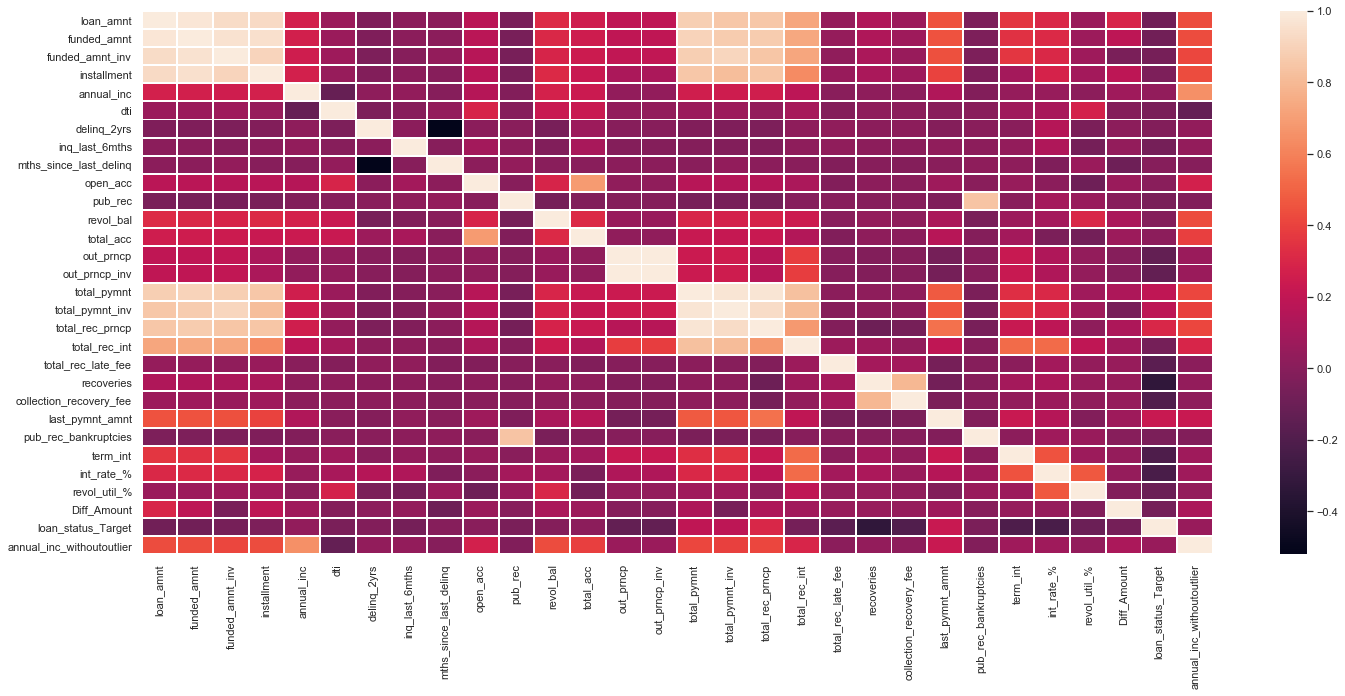

In [368]:
import seaborn as sns
sns.heatmap(loan_final.corr(), linewidths=.9)

#### List of correlated columns, but as we are not going to build any statistical model so we are not going to remove any variable.

In [114]:
# 'loan_amount' and 'funded_amnt_inv' as this is almost corellated ("<->") with'funded_amnt' 
# 'collection_recovery_fee' <-> recoveries 
# 'out_prncp_inv' <-> out_prncp
# 'total_pymnt_inv' <-> total_pymnt

In [370]:
#loan_final_eda=loan_final.drop(['loan_amnt', 'funded_amnt_inv', 'collection_recovery_fee', 'out_prncp_inv', 'total_pymnt_inv'], axis=1)

loan_final_eda=loan_final

In [ ]:
#Basic EDA

In [371]:
loan_final_eda.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,term_int,int_rate_%,revol_util_%,Diff_Amount,loan_status_Target,annual_inc_withoutoutlier
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.899565,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.042501,42.418007,12.021177,48.832741,821.994947,1.687942,65247.891522
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,13.090283,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.202603,10.622815,3.724825,28.314798,2546.115547,0.705723,32703.476426
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,5.420000,0.000000,0.000000,0.000000,4000.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,35.831483,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,36.000000,9.250000,25.500000,0.000000,2.000000,40404.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,35.831483,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,36.000000,11.860000,49.300000,9.107070,2.000000,59000.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,36.157330,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,60.000000,14.590000,72.300000,225.000000,2.000000,82300.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,60.000000,24.590000,99.900000,32474.996081,2.000000,145144.000000


In [372]:
loan_final_eda.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
mths_since_last_delinq       0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_re

# Univariate Analysis

#### Count of each category of 'Loan Status' 

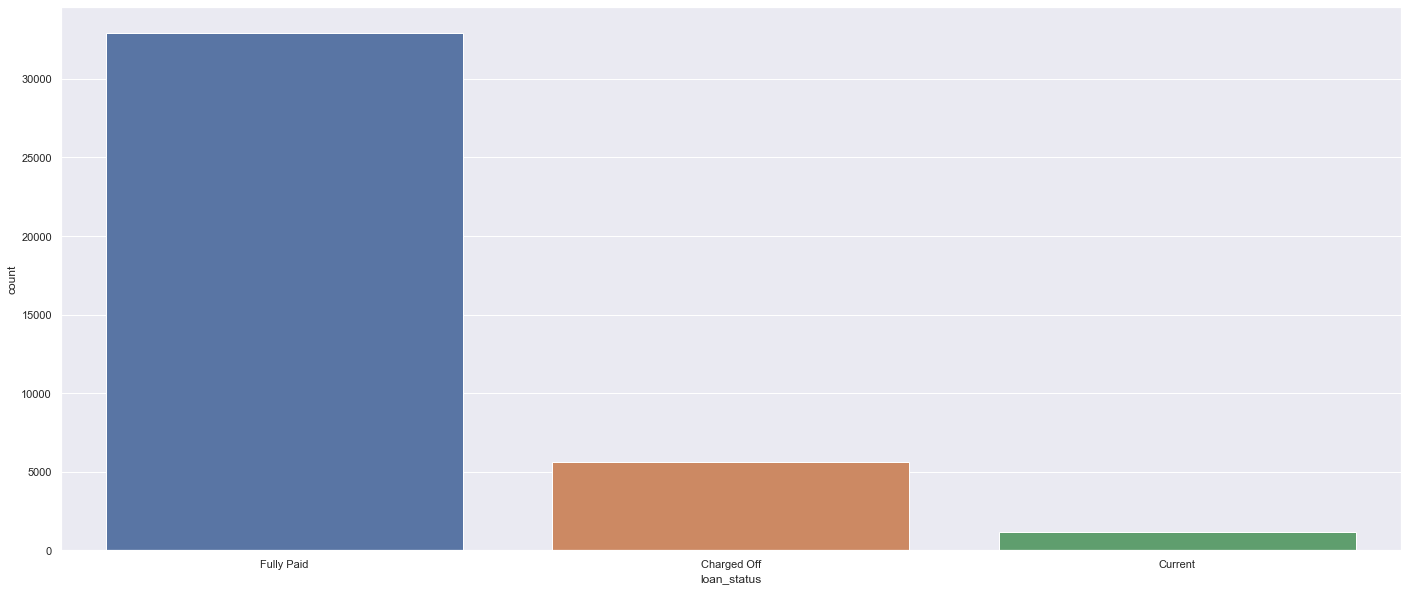

In [373]:
sns.countplot(loan_final_eda['loan_status'])

#### Analysing Pecentage contribution of customer with respect to  'Loan Status'

In [374]:
loan_final_eda['loan_status'].value_counts()/len(loan_final_eda['loan_status'])*100

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

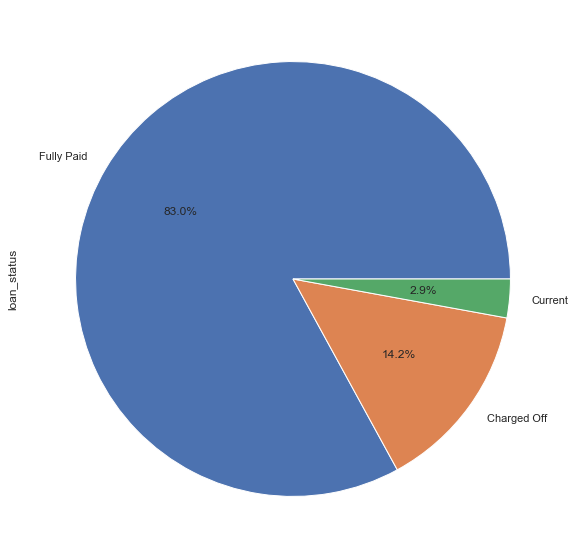

In [375]:
loan_final_eda['loan_status'].value_counts().plot(kind="pie", autopct="%1.1f%%")

#### Distribution of Funded Loan Amount

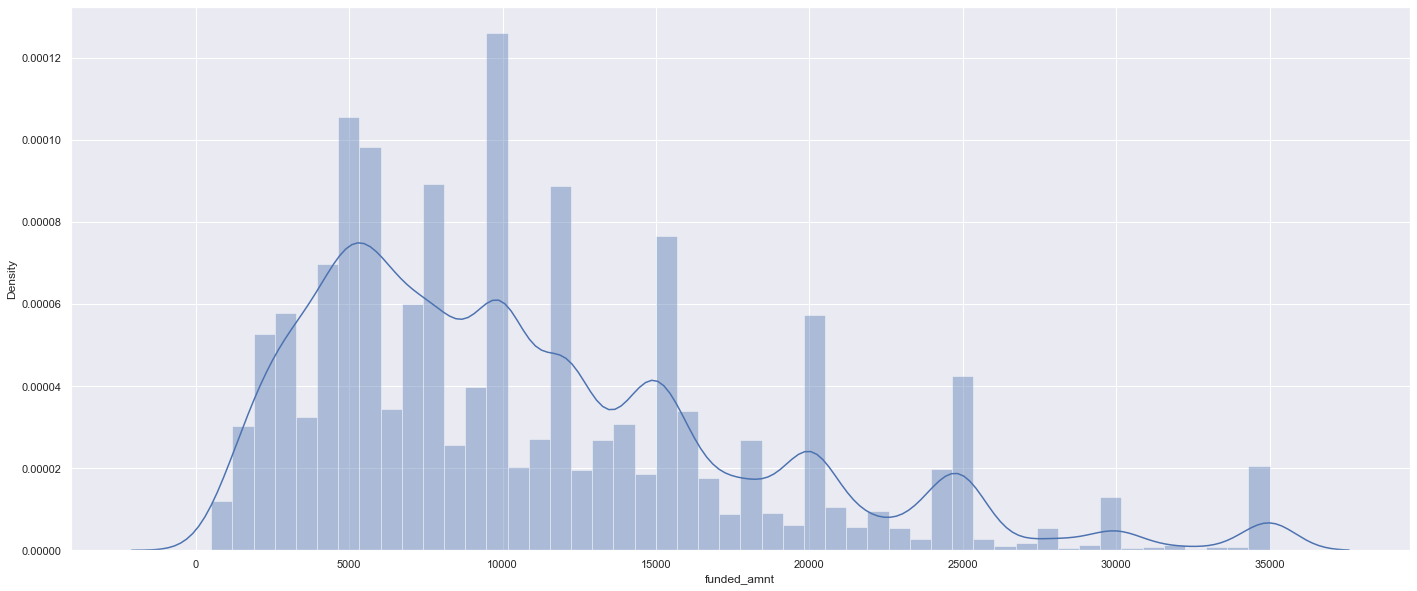

In [376]:
sns.distplot(loan_final_eda['funded_amnt'])

##### Data is right skewed , blue line shows Kernal Density Estimation (KDE) which shows probability of certain value. Eg prob for 30000 is ~0

##### Frequency Distribution of Funded Loan Amount

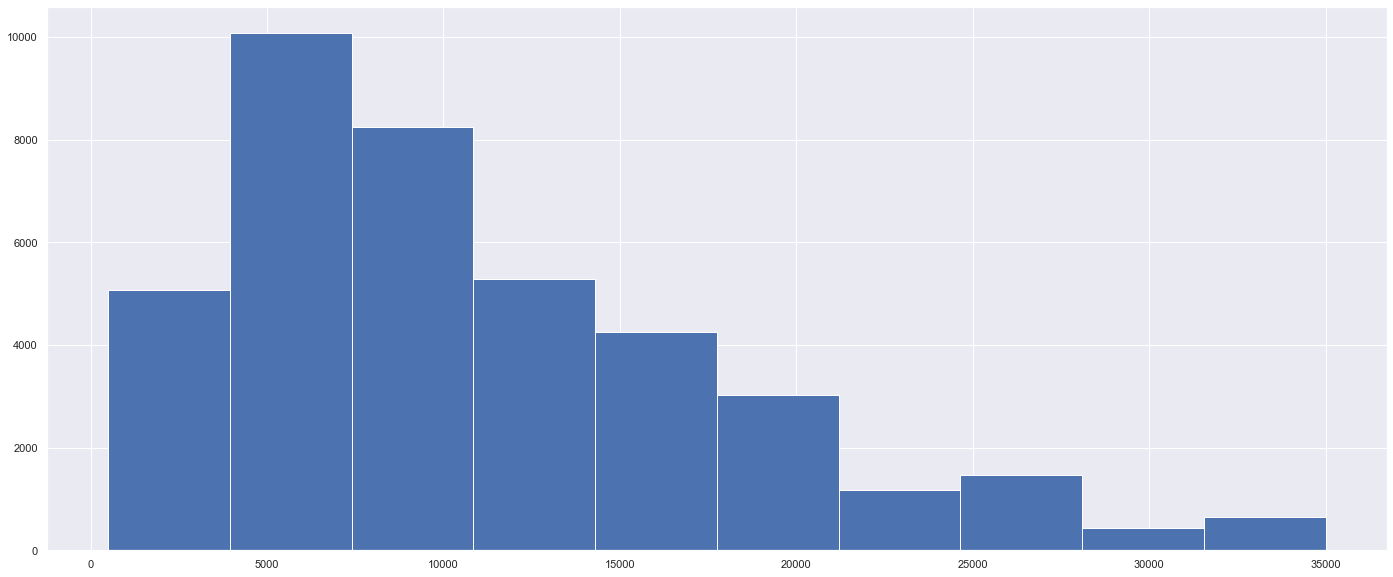

In [377]:
loan_final_eda['funded_amnt'].hist()

##### Maximum frequency of Loan funded amount is between ~ 5000 to ~7500  

#### Distribution of intrest Rate over the population 

In [378]:

loan_final_eda['int_rate_%'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate_%, dtype: float64

##### Few outlier, Min Rate of Interest is 5% , max is 25% , 75% of population are paying >= ~14.5% Rate of intrest
##### There are few people who pay high rate of intrest (>22.55, these are considered to be outlier)

#### Count Plot for Emp Length 

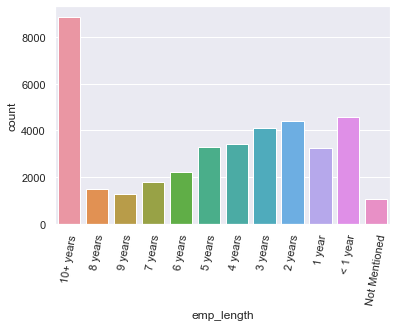

In [380]:

plt.figure(figsize=(6, 4))
sns.countplot(loan_final_eda['emp_length'], 
              order=['10+ years','8 years', '9 years', '7 years', '6 years', '5 years', '4 years','3 years', '2 years', '1 year','< 1 year', 'Not Mentioned' ])
plt.xticks(rotation=80)
plt.show()

#### Axes Level -> histplot (kde plot and rugplot)
#### Figure Level-> displot 

In [88]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


# Bivariate Analysis

##### Purpose of Loan Vs Loan Status

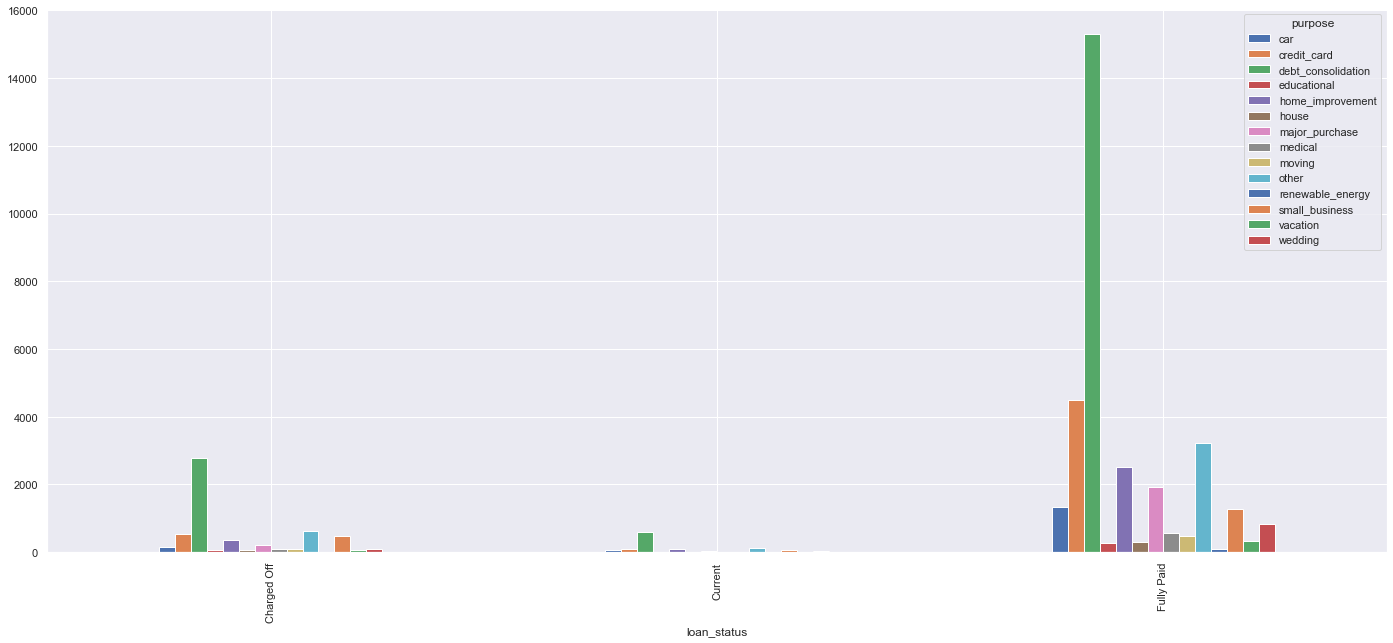

In [381]:
(pd.crosstab(loan_final['loan_status'], loan_final_eda['purpose'])).plot(kind='bar')

##### Maximum Contribution for Loan Status against Prpose of Loan is 'debt_consolidation' 

##### Relationship between annual Income and Funded Amount and Loan Status

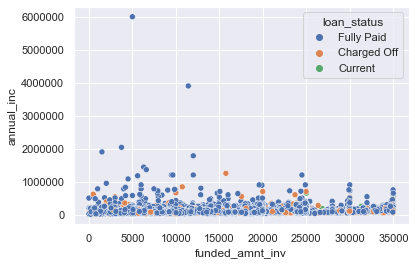

In [382]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=loan_final, x='funded_amnt_inv', y='annual_inc', hue='loan_status')

##### Annual Income Vs Loan Funded Amount Vs Loan Status

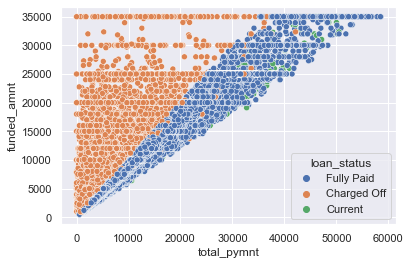

In [383]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=loan_final_eda, x='total_pymnt' , y='funded_amnt', hue='loan_status')

##### Annual Income Vs Funded Amount Vs Home Ownership

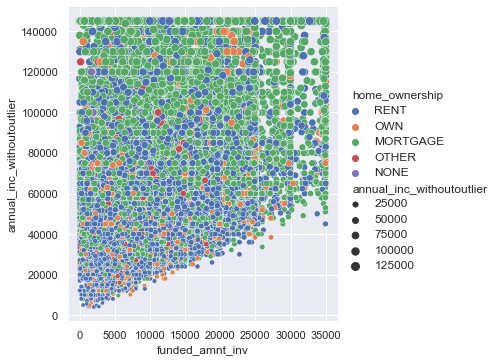

In [384]:
sns.relplot(data=loan_final_eda, y='annual_inc_withoutoutlier', x='funded_amnt_inv', hue='home_ownership', size='annual_inc_withoutoutlier')

##### Relationship between Annual Income , Funded Amount and verifivation status

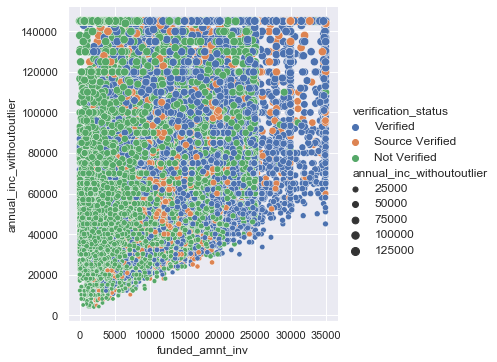

In [385]:
sns.relplot(data=loan_final_eda, y='annual_inc_withoutoutlier', x='funded_amnt_inv', hue='verification_status', size='annual_inc_withoutoutlier')

##### Relationship between annual Income , Purpose  and Verification Status

<Figure size 432x1008 with 0 Axes>

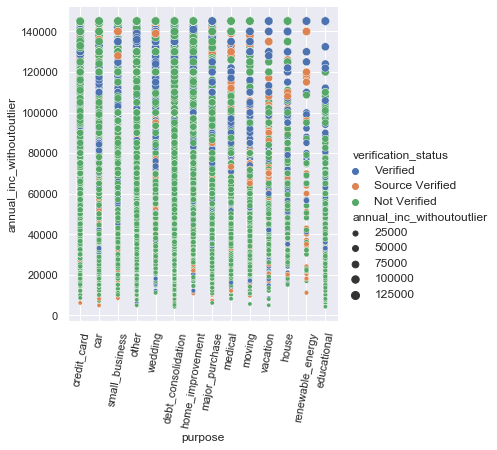

In [386]:
plt.figure(figsize=(6, 14))
sns.relplot(data=loan_final_eda, y='annual_inc_withoutoutlier', x='purpose', hue='verification_status', size='annual_inc_withoutoutlier')
plt.xticks(rotation=80)
plt.show()

##### Grade Vs Interest Rate

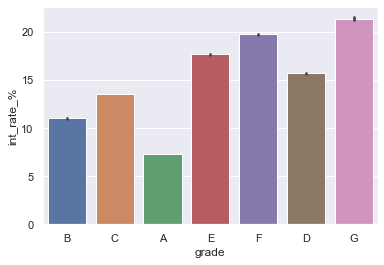

In [387]:
plt.figure(figsize=(6, 4))
sns.barplot(loan_final_eda['grade'], loan_final_eda['int_rate_%'])

##### Relationship between annual Income and Funded Amount and Loan Status(saperate plot)

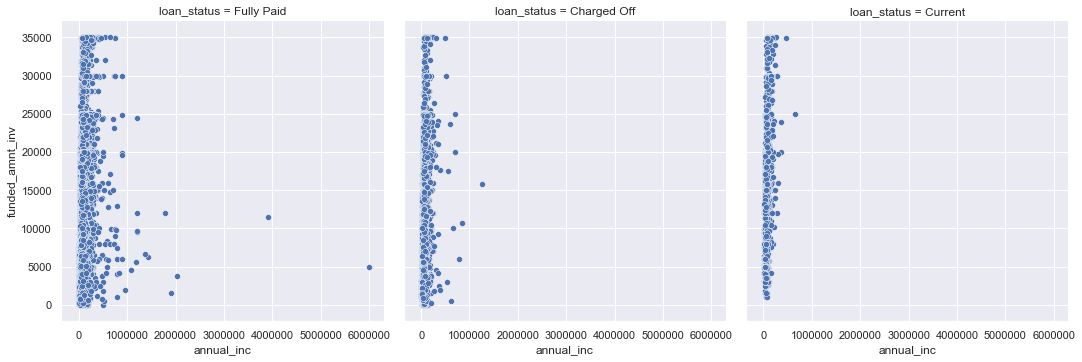

In [388]:
sns.relplot(data=loan_final_eda, x='annual_inc' , y='funded_amnt_inv', col='loan_status')

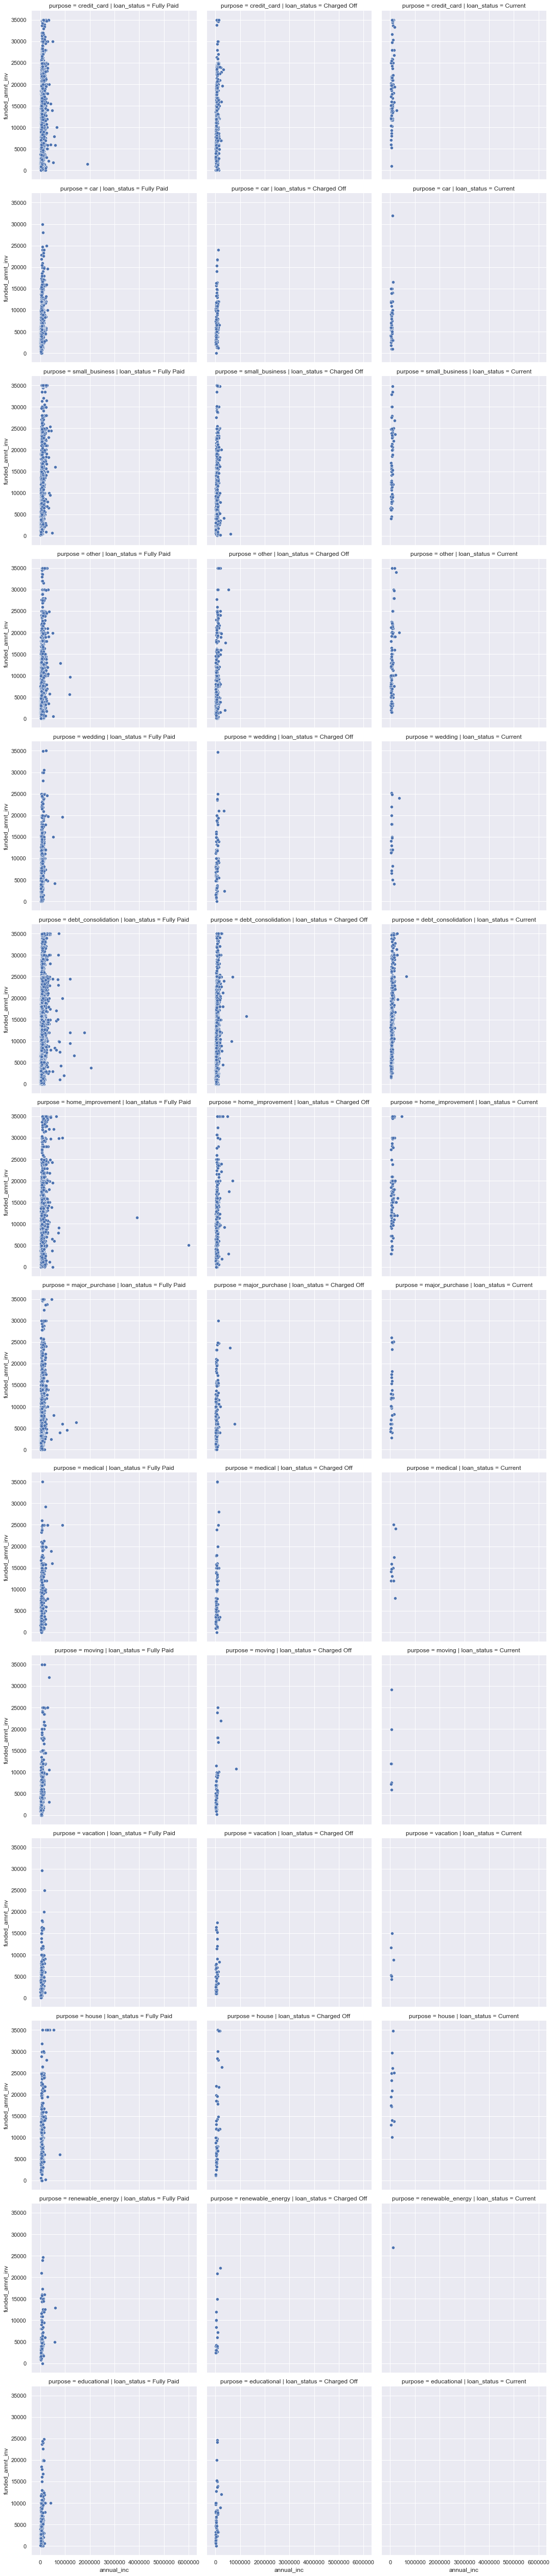

In [389]:
sns.relplot(data=loan_final_eda, x='annual_inc' , y='funded_amnt_inv', row= 'purpose', col='loan_status')

##### Relationship between Loan Purpose,  Rate of Intrest and Varification status

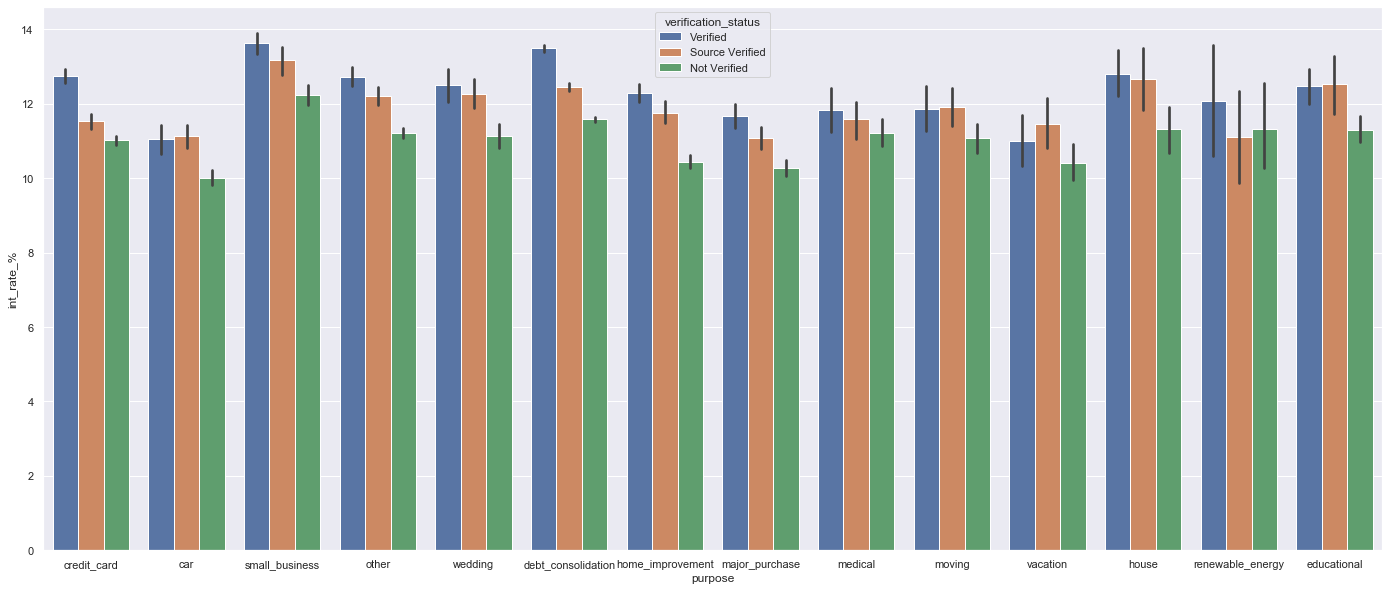

In [391]:
sns.barplot(loan_final_eda['purpose'], loan_final_eda['int_rate_%'], hue=loan_final_eda['verification_status'])

##### Purpose Vs Annual Income

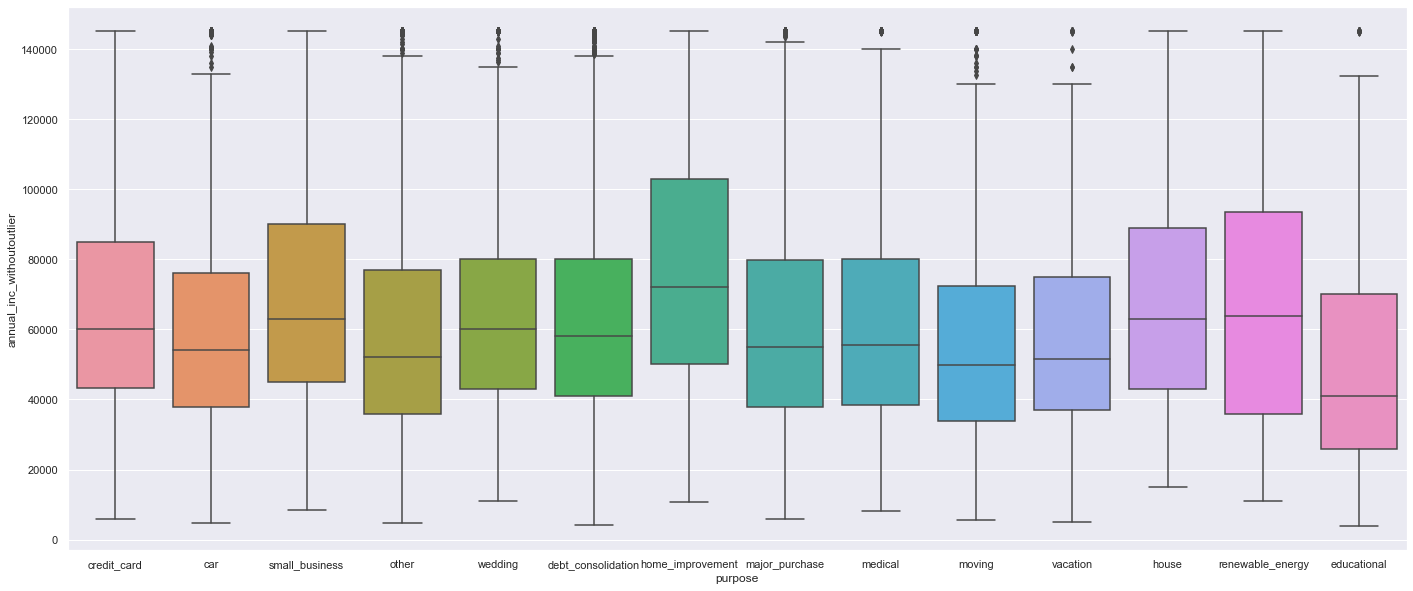

In [392]:
sns.boxplot(loan_final_eda['purpose'], loan_final_eda['annual_inc_withoutoutlier'])

##### Relationship between Purpose, Installment  and Loan Status

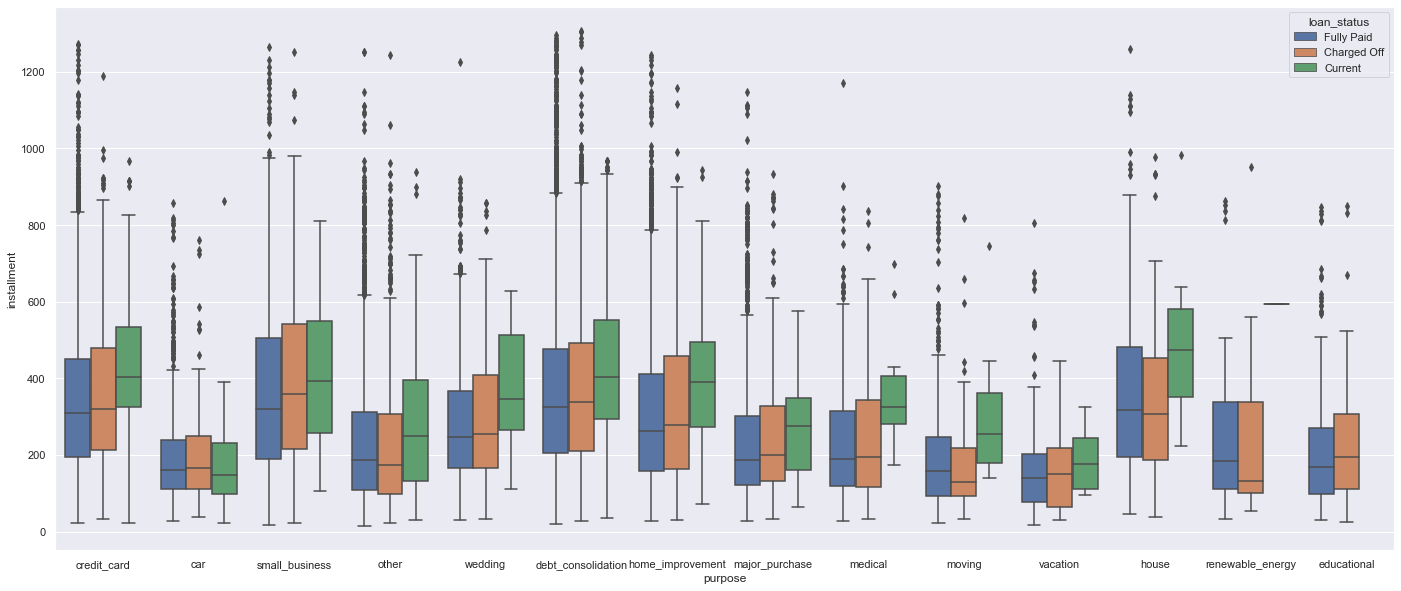

In [393]:
sns.boxplot(loan_final_eda['purpose'], loan_final_eda['installment'], hue=loan_final_eda['loan_status'])

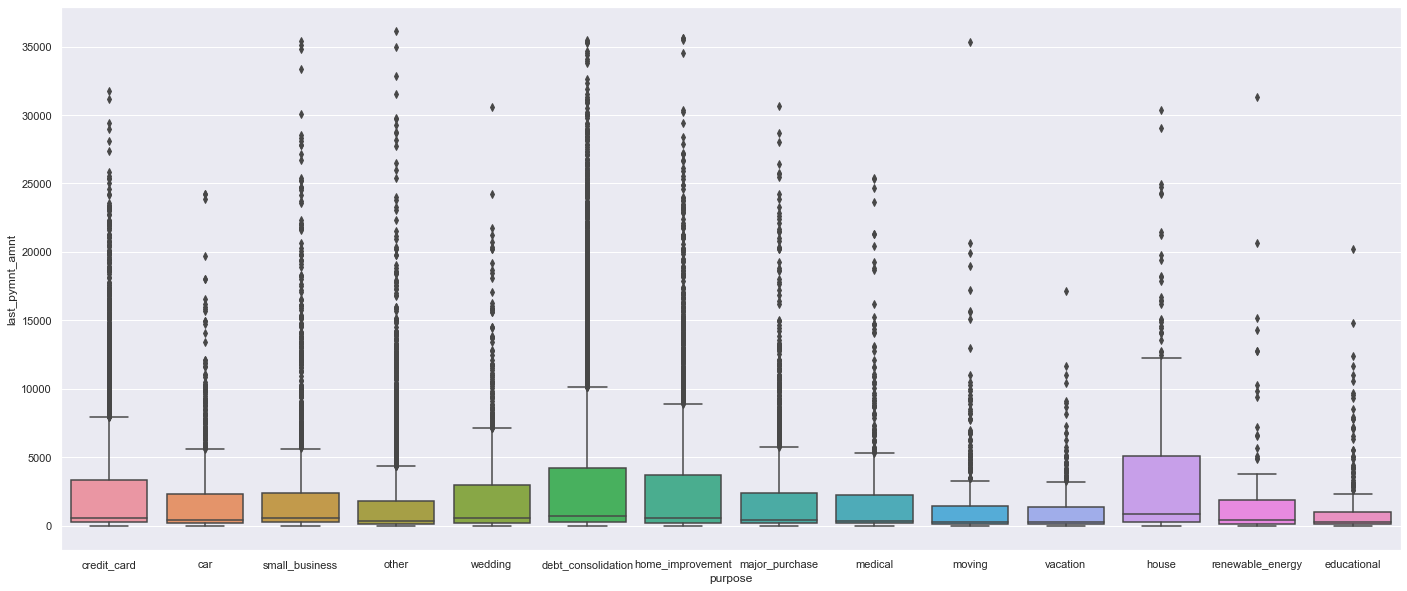

In [394]:
sns.boxplot(loan_final_eda['purpose'], loan_final_eda['last_pymnt_amnt']) 

### Recommendation

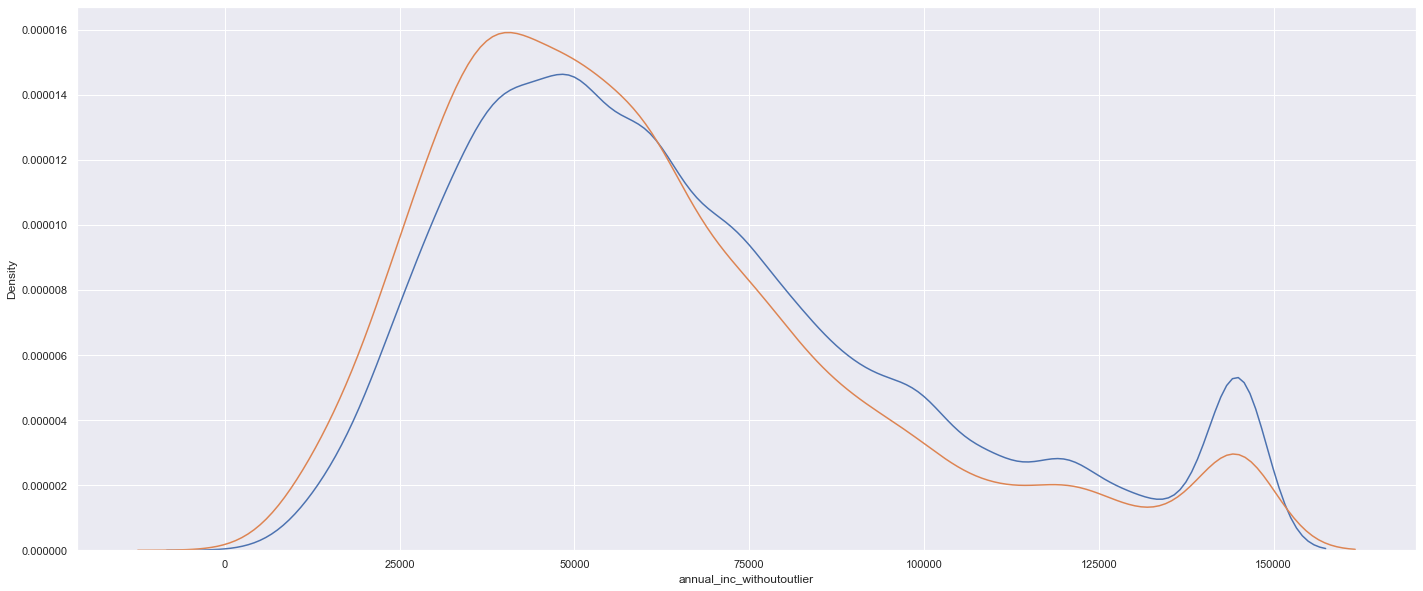

In [395]:
sns.distplot(loan_final_eda[loan_final_eda['loan_status']=='Fully Paid']['annual_inc_withoutoutlier'], hist=False)
sns.distplot(loan_final_eda[loan_final_eda['loan_status']=='Charged Off']['annual_inc_withoutoutlier'],hist=False)

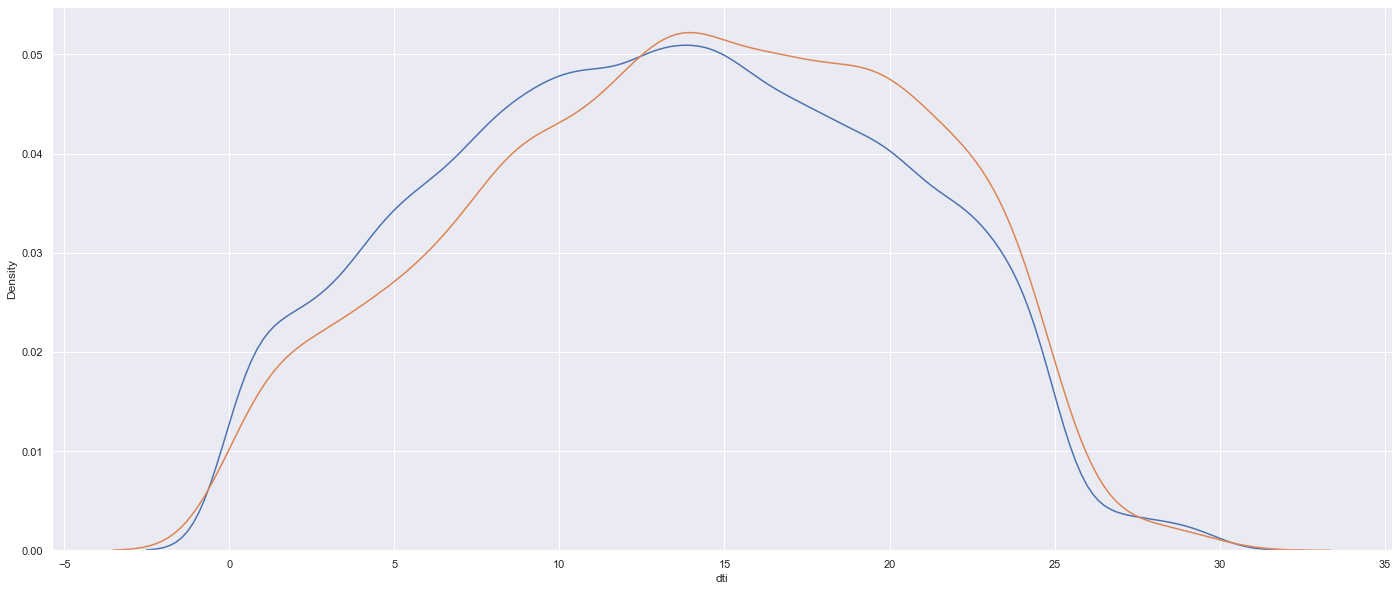

In [396]:
sns.distplot(loan_final_eda[loan_final_eda['loan_status']=='Fully Paid']['dti'], hist=False)
sns.distplot(loan_final_eda[loan_final_eda['loan_status']=='Charged Off']['dti'],hist=False)

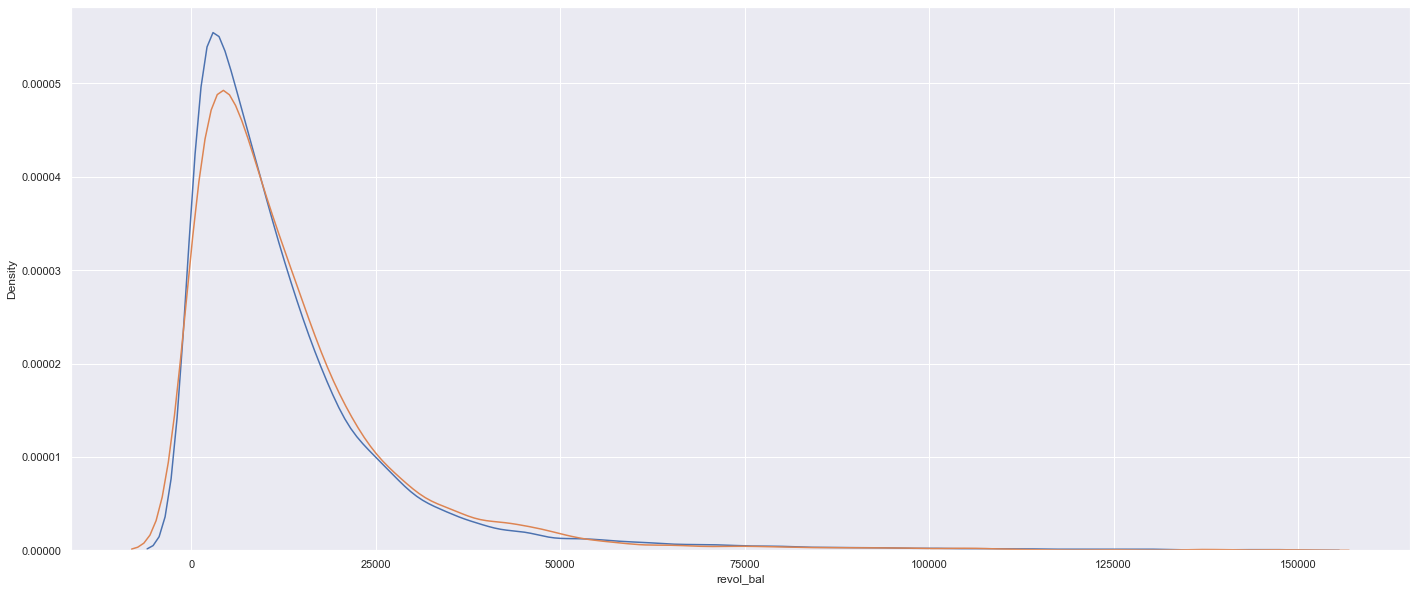

In [397]:
sns.distplot(loan_final_eda[loan_final_eda['loan_status']=='Fully Paid']['revol_bal'], hist=False)
sns.distplot(loan_final_eda[loan_final_eda['loan_status']=='Charged Off']['revol_bal'],hist=False)

In [398]:
pd.crosstab(loan_final_eda['loan_status'], loan_final_eda['grade'])

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1425,1347,1118,715,319,101
Current,40,345,264,222,179,73,17
Fully Paid,9443,10250,6487,3967,1948,657,198


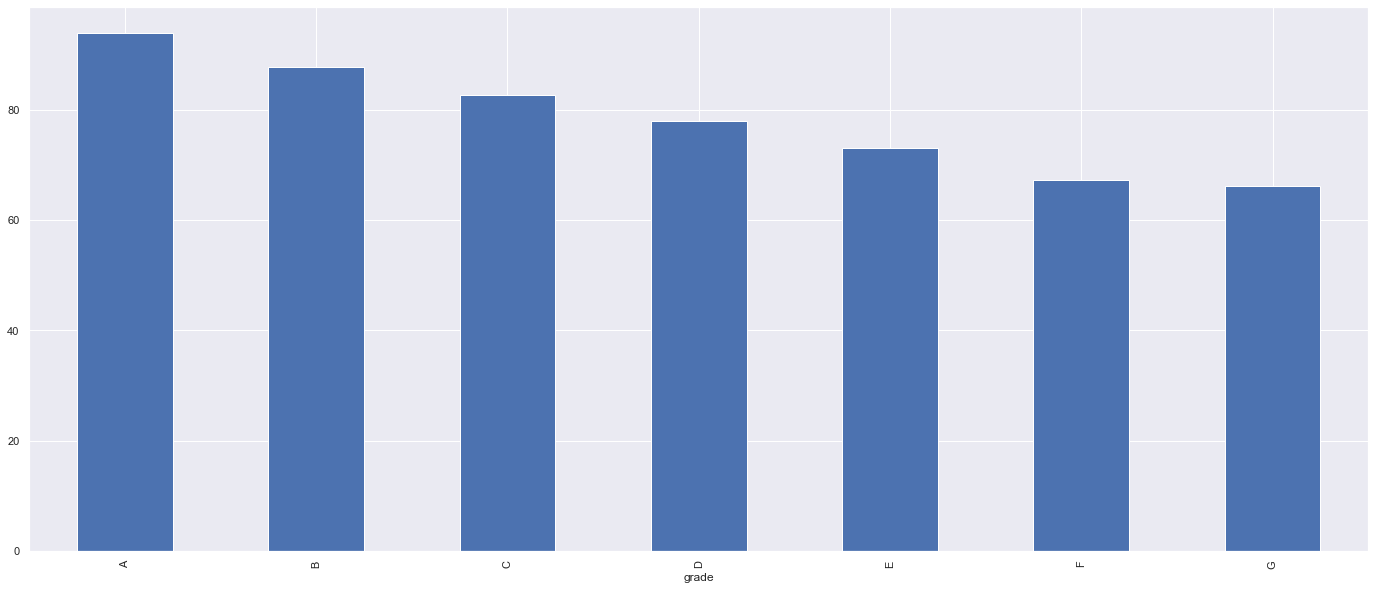

In [399]:
#creating new df for Loan status is Fully Paid or Charged Off
loan_final_eda_LS=loan_final_eda[(loan_final_eda['loan_status']=='Fully Paid') | (loan_final_eda['loan_status']=='Charged Off') ]

# Creating cateogorical to nominal data for target variable

condition=[(loan_final_eda_LS['loan_status']=='Fully Paid') , 
           (loan_final_eda_LS['loan_status']=='Charged Off')]

choice=[1,0]

loan_final_eda_LS['loan_status_New']=np.select(condition,choice)

#loan_final_eda.groupby('grde').mean()['loan_status_Target']

#loan_final_eda_LS[['loan_status','loan_status_New']]

#pd.crosstab(loan_final_eda_LS['loan_status_New'], loan_final_eda_LS['grade'])

(loan_final_eda_LS.groupby('grade').mean()['loan_status_New']*100).plot(kind='bar')
#loan_final_eda_LS.groupby('grade').mean()['loan_status_New']*100
#loan_final_eda_LS.dtypes

In [400]:
pd.crosstab(loan_final_eda_LS['loan_status_New'],loan_final_eda_LS['home_ownership'] )

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status_New,,,,,
0,2327,0,18,443,2839
1,14694,3,80,2532,15641


In [401]:
loan_final_eda_LS.groupby('emp_length').mean()['loan_status_New']*100

emp_length
1 year           85.610603
10+ years        84.319039
2 years          86.786297
3 years          86.166500
4 years          86.175943
5 years          85.660614
6 years          85.839483
7 years          84.628872
8 years          85.853659
9 years          87.112561
< 1 year         85.825200
Not Mentioned    77.928364
Name: loan_status_New, dtype: float64

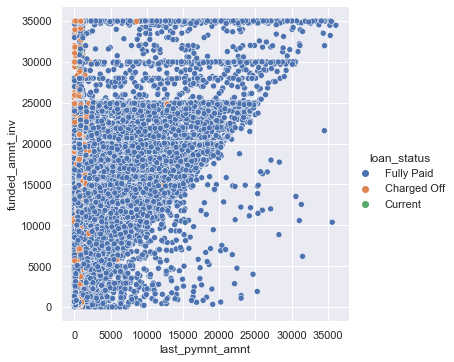

In [402]:
#sns.scatterplot(data=loan_final_eda, x='last_pymnt_amnt', y='funded_amnt_inv', hue='loan_status')
sns.relplot(data=loan_final_eda, x='last_pymnt_amnt', y='funded_amnt_inv', hue='loan_status')

<Figure size 432x1008 with 0 Axes>

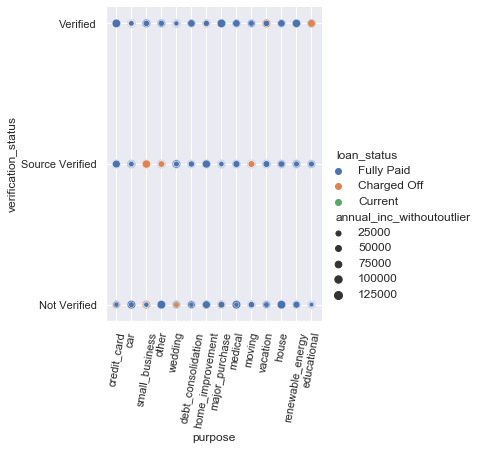

In [403]:
plt.figure(figsize=(6, 14))
sns.relplot(data=loan_final_eda, y='verification_status', x='purpose', hue='loan_status', size='annual_inc_withoutoutlier')
plt.xticks(rotation=80)
plt.show()

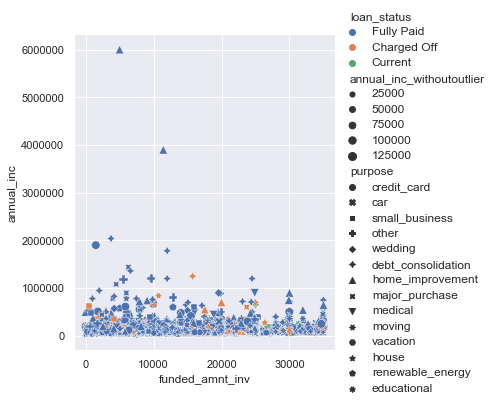

In [404]:
sns.relplot(data=loan_final_eda, y='annual_inc', x='funded_amnt_inv', hue='loan_status', style='purpose' ,size='annual_inc_withoutoutlier')